In [253]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


# **Importing libraries**

In [254]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense

In [255]:
np.random.seed(42)
tensorflow.random.set_seed(42)

# **Loading data and preprocessing**

In [256]:
df = pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [257]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [259]:
df.duplicated().sum()

0

In [260]:
df.drop(columns=['Serial No.'], inplace = True)

In [261]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [262]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [264]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Model building**

In [265]:
model = Sequential()

model.add(Input(shape = (7, )))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(7, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [266]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [267]:
history = model.fit(X_train_scaled, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.3207 - val_loss: 0.2720
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2465 - val_loss: 0.1943
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1700 - val_loss: 0.1211
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0995 - val_loss: 0.0627
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0462 - val_loss: 0.0255
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0183 - val_loss: 0.0165
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0154 - val_loss: 0.0161
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0142 - val_loss: 0.0151
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128 - val_loss: 0.0150
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 - val_loss: 0.0145
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0120 - val_loss: 0.0139
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0116 - val_l

# **Prediction**

In [268]:
y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [269]:
y_pred

array([[0.8469153 ],
       [0.8237247 ],
       [0.61731863],
       [0.6869643 ],
       [0.7596672 ],
       [0.82821226],
       [0.5504295 ],
       [0.6130273 ],
       [0.7679705 ],
       [0.8345512 ],
       [0.6936848 ],
       [0.6998497 ],
       [0.66720396],
       [0.8962501 ],
       [0.7344572 ],
       [0.46950698],
       [0.8241466 ],
       [0.5869334 ],
       [0.5345087 ],
       [0.6795747 ],
       [0.71364474],
       [0.57972187],
       [0.7302738 ],
       [0.75461745],
       [0.7458011 ],
       [0.6264994 ],
       [1.0015857 ],
       [0.8347488 ],
       [0.6461067 ],
       [0.82040215],
       [0.5748363 ],
       [0.68708134],
       [0.58172005],
       [0.8690281 ],
       [0.689299  ],
       [0.728873  ],
       [0.52638286],
       [0.9853488 ],
       [0.75431615],
       [0.71636635],
       [0.87354857],
       [0.587975  ],
       [0.6134726 ],
       [0.87844694],
       [0.8470496 ],
       [0.5233942 ],
       [0.9160049 ],
       [0.836

# **Evaluation**

In [270]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.7200391242644351


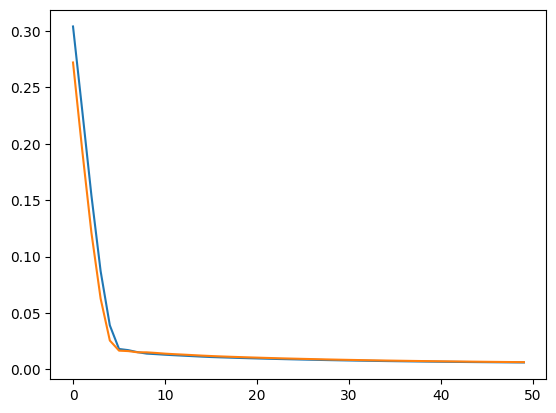

In [271]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()